# Setup

In [1]:
# import your standard packages
%run ../../../global-tools/start.py

# import your local functions
sys.path.insert(1, '../../code/')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


In [2]:
# get merged data from tigress
infn = 'Profiles_temp_psal_doxy.nc'

ds_AWG = xr.open_dataset(infn)
# print(ds.keys())

# change time variable ----------------------------------#
# set the units to be something xarray can decode
ds_AWG.time.attrs['units'] = 'days since 1800-01-01'
#re-decode the dataset
ds_AWG = xr.decode_cf(ds_AWG)

# # add time as a coordinate
ds_AWG= ds_AWG.assign_coords(unsorted_time=ds_AWG.time)

# reset profile variables to be with respect to time
ds_AWG['temp'] = xr.DataArray(ds_AWG.temp,dims = ['unsorted_time','pres'],coords =[ds_AWG.time,ds_AWG.pres])
ds_AWG['psal'] = xr.DataArray(ds_AWG.psal,dims = ['unsorted_time','pres'],coords =[ds_AWG.time,ds_AWG.pres])
ds_AWG['doxy'] = xr.DataArray(ds_AWG.doxy,dims = ['unsorted_time','pres'],coords =[ds_AWG.time,ds_AWG.pres])
ds_AWG['lat'] = xr.DataArray(ds_AWG.lat,dims = ['unsorted_time'],coords =[ds_AWG.time])
ds_AWG['lon'] = xr.DataArray(ds_AWG.lon,dims = ['unsorted_time'],coords =[ds_AWG.time])
ds_AWG['type'] = xr.DataArray(ds_AWG.type,dims = ['unsorted_time'],coords =[ds_AWG.time])
ds_AWG['prof'] = xr.DataArray(ds_AWG.prof,dims = ['unsorted_time'],coords =[ds_AWG.time])
# get rid of intial time variable
ds_AWG = ds_AWG[['temp','psal','doxy','lat','lon','type','prof']]

sorted_time = ds_AWG.unsorted_time.sortby(ds_AWG.unsorted_time)

# sort based on time
ds_AWG['temp'] = xr.DataArray(ds_AWG.temp.sortby(ds_AWG.unsorted_time),dims = ['time','pres'],coords =[sorted_time,ds_AWG.pres])
ds_AWG['psal'] = xr.DataArray(ds_AWG.psal.sortby(ds_AWG.unsorted_time),dims = ['time','pres'],coords =[sorted_time,ds_AWG.pres])
ds_AWG['doxy'] = xr.DataArray(ds_AWG.doxy.sortby(ds_AWG.unsorted_time),dims = ['time','pres'],coords =[sorted_time,ds_AWG.pres])
ds_AWG['lat'] = xr.DataArray(ds_AWG.lat.sortby(ds_AWG.unsorted_time),dims = ['time'],coords =[sorted_time])
ds_AWG['lon'] = xr.DataArray(ds_AWG.lon.sortby(ds_AWG.unsorted_time),dims = ['time'],coords =[sorted_time])
ds_AWG['type'] = xr.DataArray(ds_AWG.type.sortby(ds_AWG.unsorted_time),dims = ['time'],coords =[sorted_time])
ds_AWG['prof'] = xr.DataArray(ds_AWG.prof.sortby(ds_AWG.unsorted_time),dims = ['time'],coords =[sorted_time])
# get rid of intial time variable
ds_AWG = ds_AWG[['temp','psal','doxy','lat','lon','type','prof','time']]
ds_AWG


<xarray.Dataset>
Dimensions:  (pres: 201, time: 306118)
Coordinates:
    prof     (time) int32 286462 286463 286464 286465 ... 251414 252160 252508
  * time     (time) datetime64[ns] 1827-10-30 1836-05-15 ... 2020-02-07
  * pres     (pres) int32 0 5 10 15 20 25 30 35 ... 970 975 980 985 990 995 1000
Data variables:
    temp     (time, pres) float32 nan nan nan nan ... 6.482922 6.45122 6.4202943
    psal     (time, pres) float32 nan nan nan ... 34.940956 34.939495 34.937958
    doxy     (time, pres) float32 nan nan nan ... 48.04291 48.480473 48.916607
    lat      (time) float32 -18.0 -27.5 -7.9 -26.78 ... -3.16 11.251 1.808
    lon      (time) float32 119.83 41.0 85.33 98.5 ... 73.594 53.525 84.366
    type     (time) int32 2 2 2 2 2 2 2 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0 0 1 1 1

Text(0, 0.5, 'min doxy negs removed')

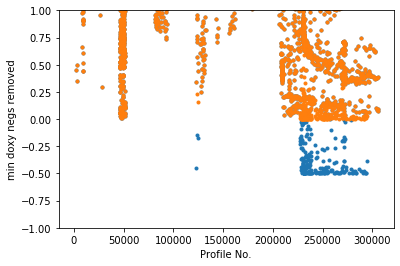

In [3]:
plt.plot(ds_AWG.doxy.min(dim = 'pres'),'.')
plt.ylim([-1,1])
plt.xlabel('Profile No.')
plt.ylabel('min doxy')

# set negative oxygen values to nan
ds_AWG['doxy'] = ds_AWG.doxy.where(ds_AWG.doxy >= 0)

plt.plot(ds_AWG.doxy.min(dim = 'pres'),'.')
plt.ylim([-1,1])
plt.xlabel('Profile No.')
plt.ylabel('min doxy negs removed')

In [4]:
# confine to be during the years of the DMI index only

ds_DMI= xr.open_dataset('../DMI/dmi_processed.nc')
ds_DMI

<xarray.Dataset>
Dimensions:          (negyears: 10, neuyears: 40, posyears: 13, snegyears: 5, sposyears: 6, time: 747, wnegyears: 5, wposyears: 7)
Coordinates:
  * time             (time) datetime64[ns] 1958-03-01 1958-04-01 ... 2020-05-01
  * posyears         (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
  * negyears         (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
  * neuyears         (neuyears) int64 1958 1959 1962 1965 ... 2014 2017 2020
  * sposyears        (sposyears) int64 1961 1972 1994 1997 2006 2019
  * snegyears        (snegyears) int64 1960 1964 1996 1998 2016
  * wposyears        (wposyears) int64 1963 1967 1977 1982 2012 2015 2018
  * wnegyears        (wnegyears) int64 1970 1971 1975 1992 2010
Data variables:
    dmi              (time) float64 ...
    dmi_3mo_runmean  (time) float64 ...
    pos_IOD_years    (posyears) int64 ...
    neg_IOD_years    (negyears) int64 ...
    neu_IOD_years    (neuyears) int64 ...
    spos_IOD_years   (sposyears) in

In [5]:
time_slice = slice('1958-06-01', '2020-05-31')
ds_AWG = ds_AWG.sel(time = time_slice)
ds_AWG

<xarray.Dataset>
Dimensions:  (pres: 201, time: 303903)
Coordinates:
    prof     (time) int32 254193 254194 254195 254196 ... 251414 252160 252508
  * time     (time) datetime64[ns] 1958-06-01 1958-06-02 ... 2020-02-07
  * pres     (pres) int32 0 5 10 15 20 25 30 35 ... 970 975 980 985 990 995 1000
Data variables:
    temp     (time, pres) float32 nan nan nan nan ... 6.482922 6.45122 6.4202943
    psal     (time, pres) float32 nan nan 36.13 ... 34.939495 34.937958
    doxy     (time, pres) float32 nan nan 174.98756 ... 48.480473 48.916607
    lat      (time) float32 13.27 13.38 13.97 12.88 ... -3.16 11.251 1.808
    lon      (time) float32 55.0 53.52 50.6 49.2 ... 64.739 73.594 53.525 84.366
    type     (time) int32 2 2 2 2 2 2 2 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0 0 1 1 1

In [6]:
import os

outfn = infn[:-3] + '_processed.nc'

# delete if already present
if os.path.isfile(outfn):
    os.remove(outfn)

ds_AWG.to_netcdf(outfn,mode='w',format = "NETCDF4")